In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from train import create_dataset
from utils.metrics import F1Score, PositiveRate, PredictedPositives
from config import project_config as config
import os
from lime import lime_image
from skimage.segmentation import mark_boundaries 
from matplotlib import pyplot as plt
from functools import partial

In [2]:
model_name = 'best_on_all'
saved_model_path = f'training_output/savedmodels/fn_best_on_all_4_features'
datapath = 'data/Tensorflow/window_21/labelled'
pred_output_path = f'Results/Predictions/{model_name}'

os.makedirs(pred_output_path, exist_ok=True)
# assert len(os.listdir(pred_output_path)) == 0, f"Output directory is not empty."  # Prevents overwriting

model = tf.keras.models.load_model(
    saved_model_path,
    custom_objects={  # These are needed to load the model. We're not calculating them here
        'F1Score': F1Score(name='F1Score'),
        'PositiveRate': PositiveRate(name='PositiveRate'),
        'PredictedPositives': PredictedPositives(name='PredictedPositives')
    }
)

In [5]:
def predict_wrapper(x):
    pred_prob = model.predict(x)
    # return np.array([pred_prob, 1 - pred_prob])
    return np.concatenate([pred_prob, 1 - pred_prob], axis=1)

In [105]:
import contextlib
# %%capture

subject_id = 21

test_dataset = create_dataset(
    f"{datapath}/sub_{subject_id:03d}*",
    compressed=False,
    has_labels=True,
    repeat=False,
    batch_size=1,
    # filters=[lambda x, y: x['central_epoch_ts'] == b'2021-07-21 01:00:00']
)
sal_maps = []
i = 1
for x, y in test_dataset:
    # pred_dict = model.predict(test_dataset)

    # print(predict_wrapper(x))
    # break
    if not (np.random.random() <= 0.05):
        continue
    
    print(i)
    i += 1
    
    features = x['features'].numpy().squeeze()
        
    explainer = lime_image.LimeImageExplainer()
    with open(os.devnull, 'w') as devnull:
        with contextlib.redirect_stdout(devnull):
            explanation = explainer.explain_instance(
                features, 
                # lambda features: predict_wrapper(x),  # classification function
                predict_wrapper,
                top_labels=1,
                hide_color=0,
                batch_size=1,
                num_samples=300,  # number of images that will be sent to classification function
            )

    # fig, axes = plt.subplots(1,3, figsize=(20, 10))

    temp, mask = explanation.get_image_and_mask(
        explanation.top_labels[0],
        positive_only=True, negative_only=False,
        num_features=10, hide_rest=True)

    sal = temp[:, :, 0]  # all 3 dims are the same
    sal_maps.append(sal)


1


100%|██████████| 300/300 [00:33<00:00,  9.05it/s]


2


100%|██████████| 300/300 [00:37<00:00,  7.90it/s]


3


100%|██████████| 300/300 [00:37<00:00,  7.98it/s]


4


100%|██████████| 300/300 [00:36<00:00,  8.20it/s]


5


100%|██████████| 300/300 [00:34<00:00,  8.67it/s]


6


100%|██████████| 300/300 [00:36<00:00,  8.20it/s]


7


100%|██████████| 300/300 [00:33<00:00,  8.83it/s]


8


100%|██████████| 300/300 [00:34<00:00,  8.65it/s]


9


100%|██████████| 300/300 [00:35<00:00,  8.50it/s]


10


100%|██████████| 300/300 [00:36<00:00,  8.29it/s]


11


100%|██████████| 300/300 [00:36<00:00,  8.13it/s]


12


100%|██████████| 300/300 [00:37<00:00,  7.99it/s]


13


100%|██████████| 300/300 [00:36<00:00,  8.14it/s]


14


100%|██████████| 300/300 [00:36<00:00,  8.19it/s]


15


100%|██████████| 300/300 [00:37<00:00,  8.10it/s]


16


100%|██████████| 300/300 [00:34<00:00,  8.62it/s]


17


100%|██████████| 300/300 [00:36<00:00,  8.23it/s]


18


100%|██████████| 300/300 [00:36<00:00,  8.21it/s]


19


100%|██████████| 300/300 [00:35<00:00,  8.49it/s]


20


100%|██████████| 300/300 [00:34<00:00,  8.67it/s]


21


100%|██████████| 300/300 [00:36<00:00,  8.31it/s]


22


100%|██████████| 300/300 [00:35<00:00,  8.51it/s]


23


100%|██████████| 300/300 [00:37<00:00,  7.95it/s]


24


100%|██████████| 300/300 [00:37<00:00,  8.03it/s]


25


100%|██████████| 300/300 [00:34<00:00,  8.66it/s]


26


100%|██████████| 300/300 [00:36<00:00,  8.19it/s]


27


100%|██████████| 300/300 [00:35<00:00,  8.37it/s]


28


100%|██████████| 300/300 [00:35<00:00,  8.46it/s]


29


100%|██████████| 300/300 [00:38<00:00,  7.79it/s]


30


100%|██████████| 300/300 [00:29<00:00, 10.03it/s]


31


100%|██████████| 300/300 [00:32<00:00,  9.13it/s]


32


100%|██████████| 300/300 [00:37<00:00,  8.10it/s]


33


100%|██████████| 300/300 [00:37<00:00,  8.03it/s]


34


100%|██████████| 300/300 [00:36<00:00,  8.14it/s]


35


100%|██████████| 300/300 [00:37<00:00,  8.05it/s]


36


100%|██████████| 300/300 [00:30<00:00,  9.93it/s]


37


100%|██████████| 300/300 [00:29<00:00, 10.22it/s]


38


100%|██████████| 300/300 [00:35<00:00,  8.57it/s]


39


100%|██████████| 300/300 [00:35<00:00,  8.38it/s]


40


100%|██████████| 300/300 [00:34<00:00,  8.78it/s]


41


100%|██████████| 300/300 [00:34<00:00,  8.76it/s]


42


100%|██████████| 300/300 [00:33<00:00,  8.85it/s]


43


100%|██████████| 300/300 [00:33<00:00,  9.05it/s]


44


100%|██████████| 300/300 [00:37<00:00,  8.00it/s]


45


100%|██████████| 300/300 [00:31<00:00,  9.58it/s]


46


100%|██████████| 300/300 [00:33<00:00,  8.90it/s]


47


100%|██████████| 300/300 [00:33<00:00,  8.88it/s]


48


100%|██████████| 300/300 [00:34<00:00,  8.63it/s]


49


100%|██████████| 300/300 [00:34<00:00,  8.72it/s]


50


100%|██████████| 300/300 [00:34<00:00,  8.81it/s]


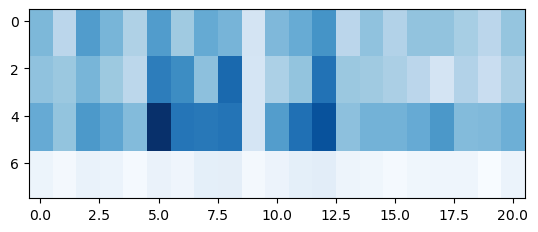

In [110]:
mean_sal = np.mean(sal_maps, axis=0)

sal_epochs = block_reduce(np.abs(mean_sal), block_size=(3000, 1), func=np.mean)
sal_epochs = np.repeat(sal_epochs, repeats=2, axis=1)
plt.imshow(sal_epochs.transpose(), cmap='Blues')
plt.show()
plt.close()

1


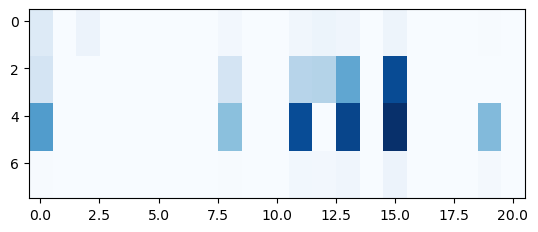

1


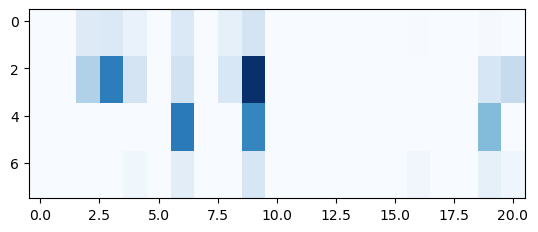

1


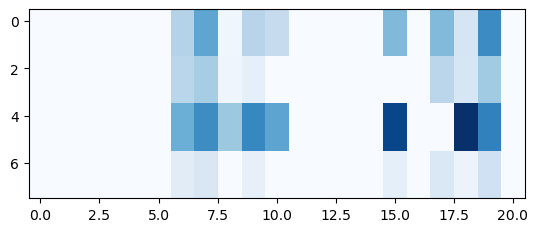

1


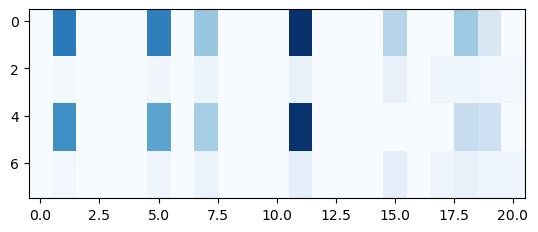

1


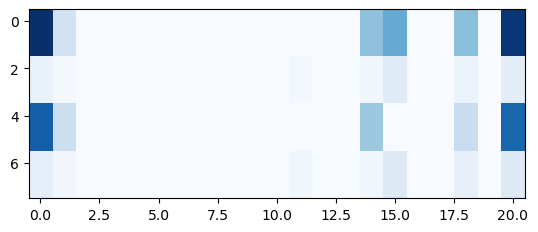

1


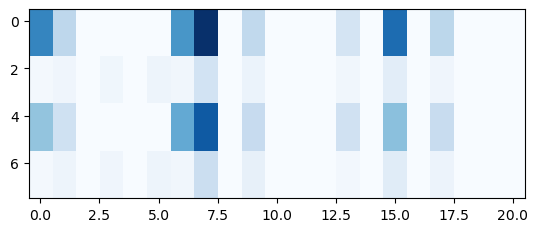

1


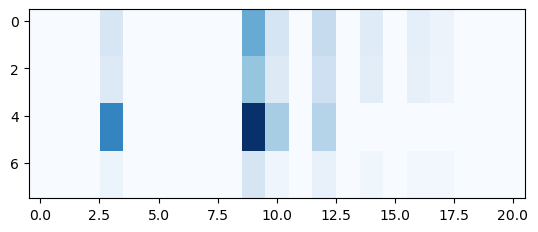

1


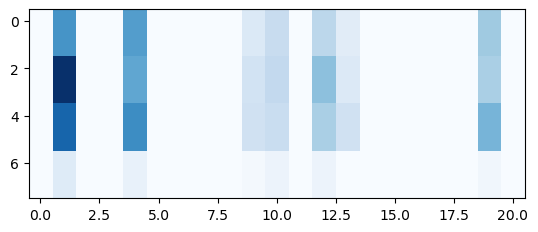

1


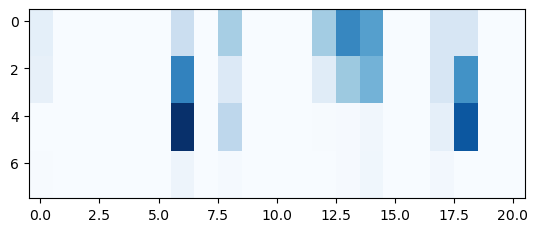

In [92]:
for sal_map in sal_maps:
    print(1)
    sal_epochs = block_reduce(np.abs(sal_map), block_size=(3000, 1), func=np.mean)
    sal_epochs = np.repeat(sal_epochs, repeats=2, axis=1)
    plt.imshow(sal_epochs.transpose(), cmap='Blues')
    plt.show()
    plt.close()

In [ ]:
# from skimage.measure import block_reduce
# from sklearn.preprocessing import minmax_scale

# # img_boundry = mark_boundaries(temp, mask)

# for k in range(21):
#     # plt.subplot(1, 2, 1)
#     sal_slice = np.repeat(sal[(k*3000):((k+1)*3000), :], repeats=200, axis=1)
    
#     # global minmax scale
#     sal_slice = sal_slice - sal_slice.min()
#     if sal_slice.max() != 0:
#         sal_slice = sal_slice / sal_slice.max()
    
#     plt.imshow(sal_slice, cmap='Blues')
#     plt.title(k)
#     plt.show()